In [89]:
from keras.preprocessing.image import ImageDataGenerator
import os

main_dir = '..\\dataset'

train_dir = os.path.join(main_dir, 'train')
test_dir = os.path.join(main_dir, 'test')
val_dir = os.path.join(main_dir, 'val')

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 18

train_gen = train_datagen.flow_from_directory(train_dir, target_size=(100, 100), color_mode= 'grayscale', batch_size=batch_size, class_mode='categorical')
test_gen = test_datagen.flow_from_directory(test_dir, target_size=(100, 100), color_mode= 'grayscale', batch_size=batch_size, class_mode='categorical')
val_gen = val_datagen.flow_from_directory(val_dir, target_size=(100, 100), color_mode= 'grayscale', batch_size=batch_size, class_mode='categorical')

Found 1929 images belonging to 10 classes.
Found 287 images belonging to 10 classes.
Found 548 images belonging to 10 classes.


In [90]:
for data_batch, label_batch in train_gen:
    print('Data batch shape:', data_batch.shape)
    print('Label batch shape:', label_batch.shape)
    break

Data batch shape: (18, 100, 100, 1)
Label batch shape: (18, 10)


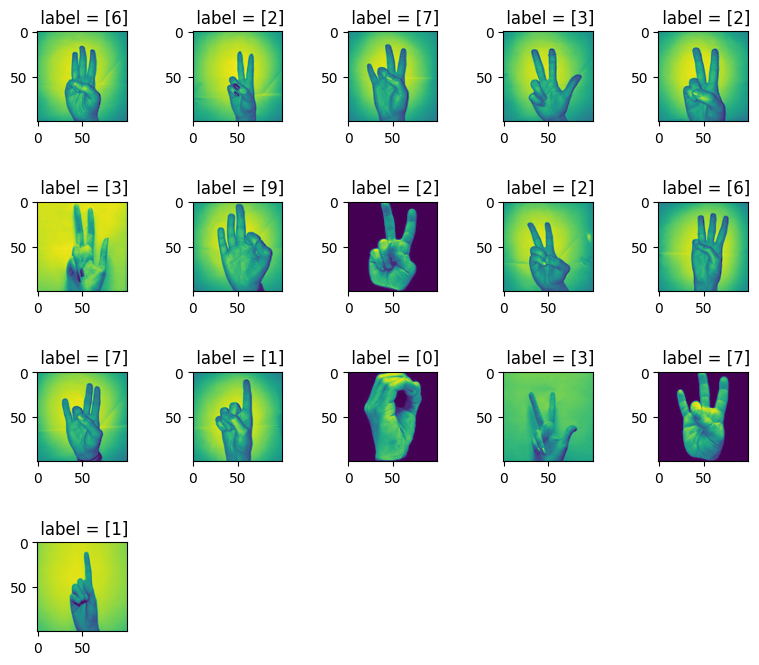

In [91]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 10))
columns = 5
rows = 5
for i in range(1, 17):
    img = data_batch[i]
    ax = fig.add_subplot(rows, columns, i)
    plt.subplots_adjust(hspace=0.9, wspace=0.01)
    label = np.where(label_batch[i] == 1)
    ax.title.set_text(" label = " + str(label[0]))
    plt.imshow(img)
plt.show()

In [92]:
# Batch parameters

train_filenames = train_gen.filenames
train_count = len(train_filenames)

val_filenames = val_gen.filenames
val_count = len(val_filenames)

test_filenames = test_gen.filenames
test_count = len(test_filenames)

train_spe =  int(train_count / batch_size)
val_spe = int(val_count / batch_size)
test_spe = int(test_count / batch_size)

In [93]:
from keras import models, layers

network = models.Sequential()

network.add(layers.Conv2D(32, (4,4), activation='relu', input_shape=(100, 100, 1)))
network.add(layers.MaxPool2D((1,1)))
network.add(layers.Flatten())
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 97, 97, 32)        544       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 97, 97, 32)       0         
 g2D)                                                            
                                                                 
 flatten_16 (Flatten)        (None, 301088)            0         
                                                                 
 dense_32 (Dense)            (None, 128)               38539392  
                                                                 
 dense_33 (Dense)            (None, 10)                1290      
                                                                 
Total params: 38,541,226
Trainable params: 38,541,226
Non-trainable params: 0
_________________________________________

In [94]:
from keras import optimizers

network.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(), metrics=['accuracy'])

history = network.fit(train_gen,
                      steps_per_epoch=train_spe,
                      epochs=9,
                      validation_data=val_gen,
                      validation_steps=val_spe)

Epoch 1/9
107/107 [==============================] - 41s 379ms/step - loss: 3.4420 - accuracy: 0.4197 - val_loss: 0.8939 - val_accuracy: 0.6704
Epoch 2/9
107/107 [==============================] - 39s 368ms/step - loss: 0.5696 - accuracy: 0.8247 - val_loss: 0.7016 - val_accuracy: 0.7500
Epoch 3/9
107/107 [==============================] - 39s 368ms/step - loss: 0.3058 - accuracy: 0.9194 - val_loss: 0.6546 - val_accuracy: 0.7907
Epoch 4/9
107/107 [==============================] - 40s 370ms/step - loss: 0.1915 - accuracy: 0.9587 - val_loss: 2.3319 - val_accuracy: 0.5963
Epoch 5/9
107/107 [==============================] - 40s 371ms/step - loss: 0.1307 - accuracy: 0.9733 - val_loss: 0.8635 - val_accuracy: 0.7667
Epoch 6/9
107/107 [==============================] - 40s 370ms/step - loss: 0.1190 - accuracy: 0.9806 - val_loss: 0.7464 - val_accuracy: 0.7870
Epoch 7/9
107/107 [==============================] - 39s 365ms/step - loss: 0.2079 - accuracy: 0.9780 - val_loss: 1.6136 - val_accuracy:

In [95]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
print('Train Accuracy:\n', train_accuracy)
print('\nValidation Accuracy:\n', val_accuracy)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
print('\nTrain Loss:\n', train_loss)
print('\nValidation Loss:\n', val_loss)

epochs = range(1,len(train_accuracy)+1)

Train Accuracy:
 [0.4196755588054657, 0.8246991038322449, 0.9194139242172241, 0.958660364151001, 0.9733123779296875, 0.9806383848190308, 0.9780219793319702, 0.9869178533554077, 0.9869178533554077]

Validation Accuracy:
 [0.6703703999519348, 0.75, 0.7907407283782959, 0.5962963104248047, 0.7666666507720947, 0.7870370149612427, 0.6944444179534912, 0.7833333611488342, 0.7833333611488342]

Train Loss:
 [3.4419686794281006, 0.5696477890014648, 0.30581462383270264, 0.19149714708328247, 0.13071581721305847, 0.11900314688682556, 0.20789854228496552, 0.09895294159650803, 0.19067907333374023]

Validation Loss:
 [0.8939394354820251, 0.7015649676322937, 0.6545928120613098, 2.331892728805542, 0.8634822964668274, 0.74640291929245, 1.6136033535003662, 0.8689215183258057, 0.9605267643928528]


In [97]:
test_loss, test_accuracy = network.evaluate(test_gen, steps=test_spe)

15/15 [==============================] - 0s 29ms/step - loss: 0.8982 - accuracy: 0.8259


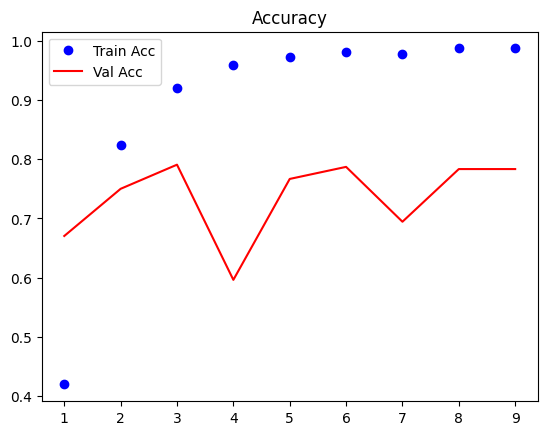

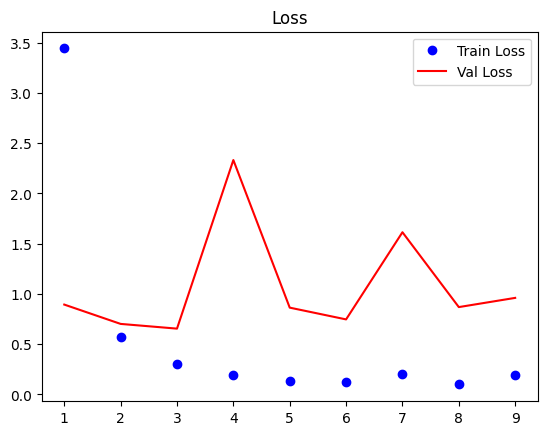

In [99]:
plt.plot(epochs, train_accuracy, 'bo', label='Train Acc')
plt.plot(epochs, val_accuracy, 'r', label='Val Acc')
plt.title('Accuracy')
plt.legend()
plt.figure()


plt.plot(epochs, train_loss, 'bo', label='Train Loss')
plt.plot(epochs, val_loss, 'r', label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()